In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import f1_score ## F1 Score 구하기
from sklearn.metrics import precision_recall_fscore_support as sk
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_excel('../optimal_data3_1/'+'Continous_2weeks_5day_3term.xlsx')
df.head()
X=df.iloc[:,[1,3,4,5,6,7]]
y=df.iloc[:,-1]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_scaler,y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_scaler.shape, y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (19500, 6) (19500,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (50937, 6) (50937,)
SMOTE 적용 전 레이블 값 분포: 
 0    16979
1     1648
2      873
Name: 8, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 0    16979
1    16979
2    16979
Name: 8, dtype: int64


In [3]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10)

#결과 넣을 배열
Result=[[0 for j in range(4)] for i in range(10)]
CMResult=[[[0 for k in range(3)]for j in range(3)] for i in range(10)]
skf.get_n_splits(X_train_over,y_train_over)

10

[0]Accuracy : 0.3873184138201806
[0]F1score : 0.2764837518972039
[0]Precision : 0.49981699032331944
[0]Recall : 0.3873184138201806



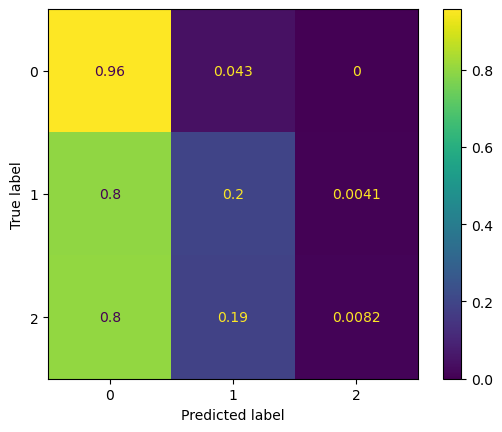

[1]Accuracy : 0.41185708676874755
[1]F1score : 0.31847562422074344
[1]Precision : 0.4470576496444195
[1]Recall : 0.41185708676874755



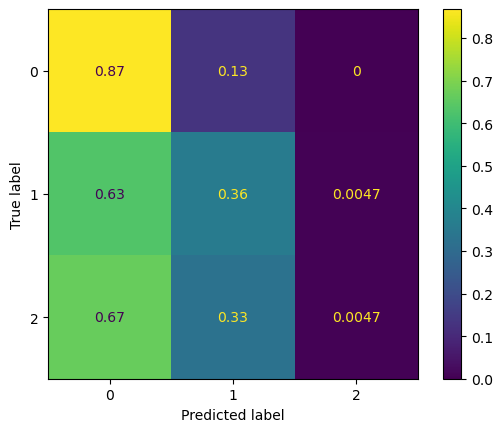

[2]Accuracy : 0.4089124460149195
[2]F1score : 0.31275837666902334
[2]Precision : 0.4631752624745847
[2]Recall : 0.4089124460149195



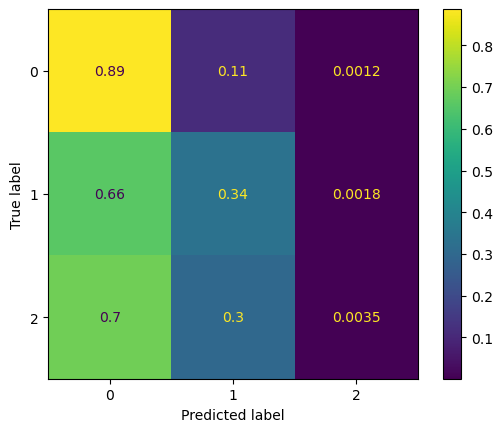

[3]Accuracy : 0.4018453082057322
[3]F1score : 0.3109496213058743
[3]Precision : 0.5646741005050364
[3]Recall : 0.4018453082057322



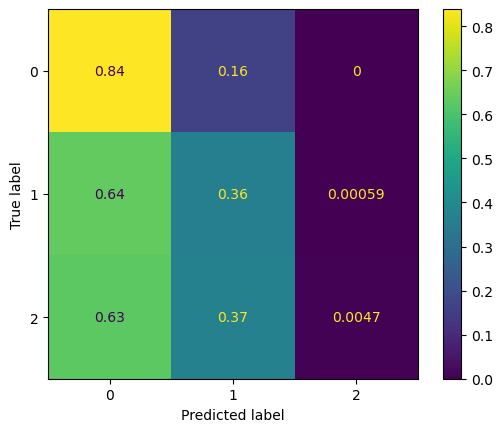

[4]Accuracy : 0.35924617196702
[4]F1score : 0.26017143101078266
[4]Precision : 0.41201148315807856
[4]Recall : 0.35924617196702



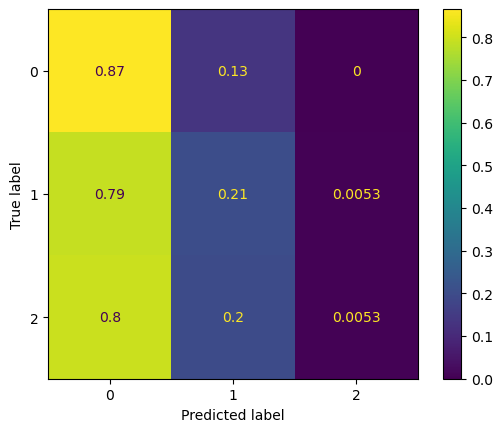

[5]Accuracy : 0.4224577934825285
[5]F1score : 0.3265891401738507
[5]Precision : 0.45210861611355324
[5]Recall : 0.4224577934825285



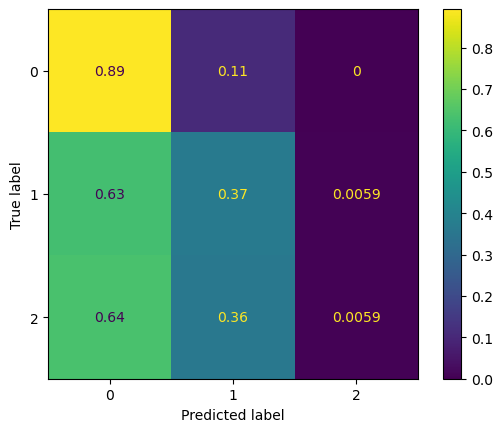

[6]Accuracy : 0.3419709462112289
[6]F1score : 0.25083480456963153
[6]Precision : 0.4380024838326548
[6]Recall : 0.3419709462112289



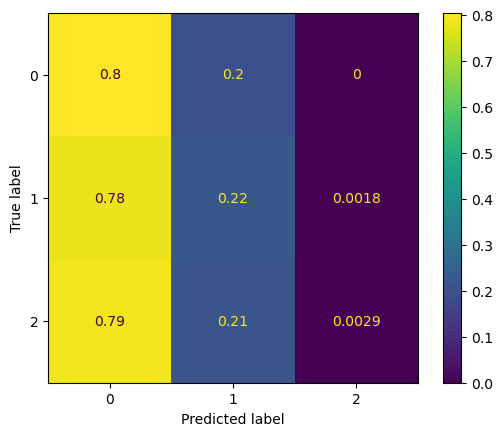

[7]Accuracy : 0.39171411741606127
[7]F1score : 0.3072200658251594
[7]Precision : 0.5318777433231126
[7]Recall : 0.39171411741606127



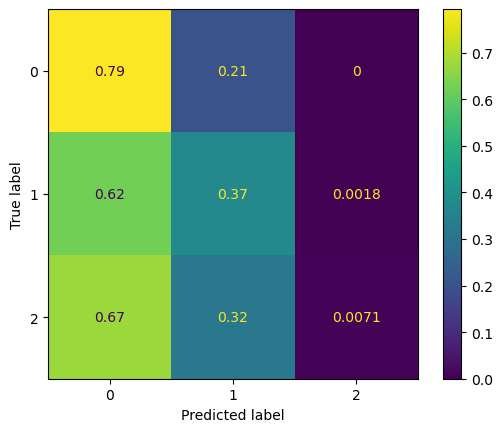

[8]Accuracy : 0.3944629884154722
[8]F1score : 0.303655513615437
[8]Precision : 0.49297487921335437
[8]Recall : 0.3944629884154722



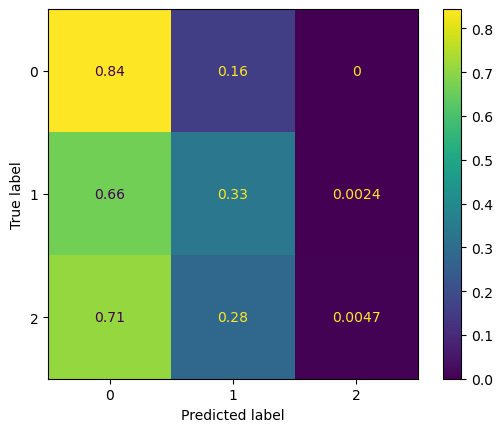

[9]Accuracy : 0.37698802277635973
[9]F1score : 0.28807212117607806
[9]Precision : 0.4830531631565448
[9]Recall : 0.37698802277635973



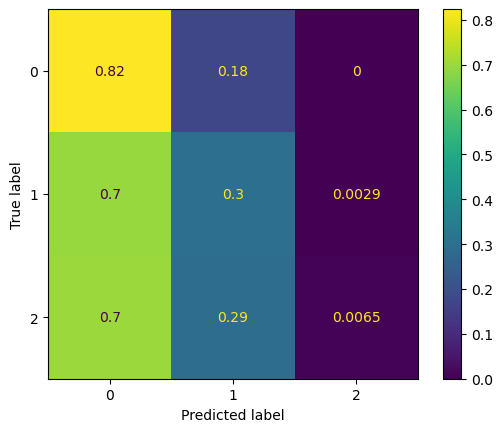

In [4]:
i=0
for tfold, (train_index, test_index) in enumerate(skf.split(X_train_over, y_train_over)):
    #모델 정의, 예측

    X_train, X_test = X_train_over[train_index], X_train_over[test_index]
    y_train, y_test = y_train_over[train_index], y_train_over[test_index]

    model = GaussianNB()
    model.fit(X_train, y_train)
    
    
    predict=model.predict(X_test)
    #Accuracy
    print("[{}]Accuracy : {}".format(i,model.score(X_test,y_test)))
    #f1score
    f1 = f1_score(y_test,predict, average='weighted')
    print("[{}]F1score : {}".format(i,f1))
    #precision/recall
    list=sk(y_test,predict,beta=1,average='weighted')
    print("[{}]Precision : {}".format(i,list[0]))
    print("[{}]Recall : {}".format(i,list[1]))
    print()
    
    #결과 배열에 넣기
    Result[i][0]=model.score(X_test,y_test)
    Result[i][1]=list[2]
    Result[i][2]=list[0]
    Result[i][3]=list[1]
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    confusion_matrix(y_test, predict)

    cm = confusion_matrix(y_test, predict, labels=[0,1,2],normalize="true")
    CMResult[i]=cm
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
    disp.plot()
    filename=("ConfusionMatrix_"+str(i))
    plt.savefig("./ConfusionMatrix/"+filename+".png")
    plt.show()
    
    i=i+1
    

In [5]:
Result_df=pd.DataFrame(Result,columns=['Accuracy','F1-Score','Precision','Recall'])
Result_df

,Accuracy,F1-Score,Precision,Recall
0,0.387318,0.276484,0.499817,0.387318
1,0.411857,0.318476,0.447058,0.411857
2,0.408912,0.312758,0.463175,0.408912
3,0.401845,0.310950,0.564674,0.401845
4,0.359246,0.260171,0.412011,0.359246
5,0.422458,0.326589,0.452109,0.422458
6,0.341971,0.250835,0.438002,0.341971
7,0.391714,0.307220,0.531878,0.391714
8,0.394463,0.303656,0.492975,0.394463
9,0.376988,0.288072,0.483053,0.376988


In [6]:
print("Average of Accuracy {}".format(Result_df['Accuracy'].mean()))
print("Average of F1-Score {}".format(Result_df['F1-Score'].mean()))
print("Average of Precision {}".format(Result_df['Precision'].mean()))
print("Average of Recall {}".format(Result_df['Recall'].mean()))

Average of Accuracy 0.3896773295078251
Average of F1-Score 0.29552104504637844
Average of Precision 0.47847523717446583
Average of Recall 0.3896773295078251


In [7]:
Matrix=pd.DataFrame(Result_df['Accuracy'],columns=['Accuracy'])
Matrix['Accuracy']=Result_df['Accuracy']
A=[Result_df['Accuracy'].mean(),Result_df['F1-Score'].mean(),Result_df['Precision'].mean(),Result_df['Recall'].mean()]
A=pd.DataFrame(A,columns=['Accuracy'])
Matrix=pd.concat([Matrix,A])
Matrix=Matrix.transpose()
Matrix.to_excel('./PFMatrix.xlsx')

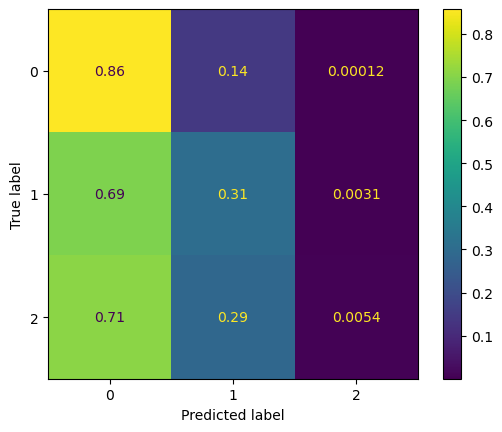

In [8]:
import numpy as np

AverageCM=[[0 for i in range(3)] for j in range(3)]
for i in range(10):
    for j in range(3):
        for k in range(3):
            AverageCM[j][k]=AverageCM[j][k]+CMResult[i][j][k]

for j in range(3):
        for k in range(3):
            AverageCM[j][k]=AverageCM[j][k]/10
            
AverageCM=np.array(AverageCM)           
disp = ConfusionMatrixDisplay(confusion_matrix=AverageCM,display_labels=[0,1,2])
disp.plot()
filename=("AverageConfusionMatrix.png")
plt.savefig(filename+".png")
plt.show()